In [1]:
import pandas as pd
import datetime

In [2]:
df = pd.read_excel('RURUSD.xlsx')

In [3]:
df

,data,curs
0,2022-10-04,57.5664
1,2022-10-01,55.2987
2,2022-09-30,57.4130
3,2022-09-29,58.4485
4,2022-09-28,58.1756
...,...,...
755,2019-09-07,65.9981
756,2019-09-06,66.0528
757,2019-09-05,66.5002
758,2019-09-04,66.9072


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    760 non-null    datetime64[ns]
 1   curs    760 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [5]:
df = df.sort_values(by='data').reset_index(drop=True)

<AxesSubplot:xlabel='data'>

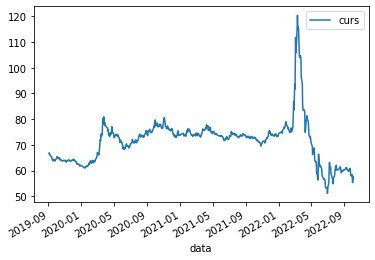

In [6]:
import matplotlib.pyplot as plt

df.set_index('data').plot()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df.set_index('data', inplace = True)

In [9]:
df

,curs
data,
2019-09-03,66.6235
2019-09-04,66.9072
2019-09-05,66.5002
2019-09-06,66.0528
2019-09-07,65.9981
...,...
2022-09-28,58.1756
2022-09-29,58.4485
2022-09-30,57.4130


In [10]:
# функция по созданию сгенерированных признаков
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['is_weekend'] = data.index.isin([5,6])*1
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['curs'].shift(lag)

    data['y_mean'] = data['curs'].shift().rolling(rolling_mean_size).mean().copy()

In [13]:
make_features(df,30,3)

In [14]:
df

,curs,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,y_mean
data,,,,,,,,,,,,,,,,,,,,,
2019-09-03,66.6235,2019,9,3,1,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-04,66.9072,2019,9,4,2,0,66.6235,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-05,66.5002,2019,9,5,3,0,66.9072,66.6235,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-06,66.0528,2019,9,6,4,0,66.5002,66.9072,66.6235,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.676967
2019-09-07,65.9981,2019,9,7,5,0,66.0528,66.5002,66.9072,66.6235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.486733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28,58.1756,2022,9,28,2,0,57.9990,58.1006,59.8318,60.8685,...,60.0924,59.7699,59.9974,59.8963,59.7419,59.1321,59.9570,60.7552,61.4247,58.643800
2022-09-29,58.4485,2022,9,29,3,0,58.1756,57.9990,58.1006,59.8318,...,60.3636,60.0924,59.7699,59.9974,59.8963,59.7419,59.1321,59.9570,60.7552,58.091733
2022-09-30,57.4130,2022,9,30,4,0,58.4485,58.1756,57.9990,58.1006,...,60.3677,60.3636,60.0924,59.7699,59.9974,59.8963,59.7419,59.1321,59.9570,58.207700


In [15]:
df.dropna(inplace = True)

In [19]:
df

,curs,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,y_mean
data,,,,,,,,,,,,,,,,,,,,,
2019-10-15,64.3652,2019,10,15,1,0,64.2237,64.7416,65.0976,64.8672,...,65.1909,65.4321,65.4393,65.5698,65.9981,66.0528,66.5002,66.9072,66.6235,64.687633
2019-10-16,64.2548,2019,10,16,2,0,64.3652,64.2237,64.7416,65.0976,...,64.4711,65.1909,65.4321,65.4393,65.5698,65.9981,66.0528,66.5002,66.9072,64.443500
2019-10-17,64.3455,2019,10,17,3,0,64.2548,64.3652,64.2237,64.7416,...,63.8272,64.4711,65.1909,65.4321,65.4393,65.5698,65.9981,66.0528,66.5002,64.281233
2019-10-18,64.0144,2019,10,18,4,0,64.3455,64.2548,64.3652,64.2237,...,64.1213,63.8272,64.4711,65.1909,65.4321,65.4393,65.5698,65.9981,66.0528,64.321833
2019-10-19,63.9542,2019,10,19,5,0,64.0144,64.3455,64.2548,64.3652,...,64.4290,64.1213,63.8272,64.4711,65.1909,65.4321,65.4393,65.5698,65.9981,64.204900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28,58.1756,2022,9,28,2,0,57.9990,58.1006,59.8318,60.8685,...,60.0924,59.7699,59.9974,59.8963,59.7419,59.1321,59.9570,60.7552,61.4247,58.643800
2022-09-29,58.4485,2022,9,29,3,0,58.1756,57.9990,58.1006,59.8318,...,60.3636,60.0924,59.7699,59.9974,59.8963,59.7419,59.1321,59.9570,60.7552,58.091733
2022-09-30,57.4130,2022,9,30,4,0,58.4485,58.1756,57.9990,58.1006,...,60.3677,60.3636,60.0924,59.7699,59.9974,59.8963,59.7419,59.1321,59.9570,58.207700


In [21]:
X_train,X_test, y_train, y_test = train_test_split(df.drop('curs',axis=1),
                                                  df.curs,
                                                  shuffle = False,
                                                  test_size = 0.2)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
print('Ошибка на Train',round(mean_absolute_error(y_train, lr.predict(X_train)),2))

Ошибка на Train 0.53


In [27]:
print('Ошибка на Test',round(mean_absolute_error(y_test, lr.predict(X_test)),2))

Ошибка на Test 1.76


## Предсказываем на 5 октября

In [29]:
df_new = pd.DataFrame(df['curs']).reset_index().copy()

In [30]:
df_new

,data,curs
0,2019-10-15,64.3652
1,2019-10-16,64.2548
2,2019-10-17,64.3455
3,2019-10-18,64.0144
4,2019-10-19,63.9542
...,...,...
725,2022-09-28,58.1756
726,2022-09-29,58.4485
727,2022-09-30,57.4130
728,2022-10-01,55.2987


In [31]:
df_concat = df_new.tail(1).copy()

In [32]:
df_concat.reset_index( inplace = True , drop=True)

In [33]:
df_concat

,data,curs
0,2022-10-04,57.5664


In [34]:
#df_concat['dDate'] = pd.to_datetime('2022-10-04')

In [35]:
import numpy as np
df_concat['curs'] = 0

In [36]:
df_concat

,data,curs
0,2022-10-04,0


In [38]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    1 non-null      datetime64[ns]
 1   curs    1 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 144.0 bytes


In [39]:
df2 = pd.concat([df_new,df_concat], ignore_index=True)
df2

,data,curs
0,2019-10-15,64.3652
1,2019-10-16,64.2548
2,2019-10-17,64.3455
3,2019-10-18,64.0144
4,2019-10-19,63.9542
...,...,...
726,2022-09-29,58.4485
727,2022-09-30,57.4130
728,2022-10-01,55.2987
729,2022-10-04,57.5664


### Генерируем фичи для 5 октября

In [40]:
df2.set_index('data', inplace = True)

In [41]:
df2.tail()

,curs
data,
2022-09-29,58.4485
2022-09-30,57.4130
2022-10-01,55.2987
2022-10-04,57.5664
2022-10-04,0.0000


In [42]:
make_features(df2,30,3)

In [43]:
df2.drop('curs',axis=1).tail(1)

,year,month,day,dayofweek,is_weekend,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28,lag_29,lag_30,y_mean
data,,,,,,,,,,,,,,,,,,,,,
2022-10-04,2022,10,4,1,0,57.5664,55.2987,57.413,58.4485,58.1756,...,60.3713,60.237,60.2386,60.3677,60.3636,60.0924,59.7699,59.9974,59.8963,56.759367


In [44]:
lr_full = LinearRegression()

In [46]:
lr_full.fit(df.drop('curs',axis=1),df.curs)

LinearRegression()

In [47]:
print('Предсказание на 5 октября - ',lr.predict(df2.drop('curs',axis=1).tail(1))[0])

Предсказание на 5 октября -  56.63935954623287


In [48]:
print('Предсказание на 5 октября, модель видела весь датасет - ',lr_full.predict(df2.drop('curs',axis=1).tail(1))[0])

Предсказание на 5 октября, модель видела весь датасет -  58.02108036922088


In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [50]:
gb = GradientBoostingRegressor()

In [51]:
gb.fit(df.drop('curs',axis=1),df.curs)

GradientBoostingRegressor()

In [52]:
gb.predict(df2.drop('curs',axis=1).tail(1))[0]

57.19355050342142

57,19 ₽  курс на 5 октября

**На самом деле курс на 05.10.200 - 58.7913. Вывод - модель предсказала наиболее верно, обучаясь на всем датасете**